# **Movie Recommendation**<B>
![](data/title_image.png)<B>
* A market basket contains a group of products or services customers purchase frequently<b> 
* This reserch will create a movie recommendation system using the Apriori algorithm<b>

<h2 id="Top"><b>Top</b></h2>
<li><a href="#Import-modules">Import modules</a></li>
<li><a href="#Load-data">Load data</a></li>
<li><a href="#Basic-statistics">Basic statistics</a></li>
<li><a href="#Data-Cleanup">Data Cleanup</a></li>
<li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Feature-Engineering">Feature Engineering</a></li>
<li><a href="#Data-preprocessing">Data preprocessing</a></li>
<li><a href="#Finalize-Dataset">Finalize Dataset</a></li>
<li><a href="#Feature-Selection-Using-RFE-(Recursive-Feature-Elimination)">Feature Selection Using RFE (Recursive Feature Elimination)</a></li>
<li><a href="#Market-Basket-Creation">Market Basket Creation</a></li>
<li><a href="#Apriori-Association-Rule-Creation">Apriori Association Rule Creation</a></li>
<li><a href="#Conclusion">Conclusion</a></li>

<h2 id="Import-modules"><b>Import Modules</b></h2>
<a href="#Top"><h5>Top</h5></a>

In [1]:
#### Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333",
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

<h2 id="Load-data"><b>Load data</b></h2>
<a href="#Top"><h5>Top</h5></a>

In [5]:
# Load dataset
df_links = pd.read_csv('data/links.csv')
df_movies = pd.read_csv('data/movies.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_tags = pd.read_csv('data/tags.csv')

In [6]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<h2 id="Basic-statistics"><b>Basic statistics</b></h2> 
<a href="#Top"><h5>Top</h5></a>

* df_links contains 9742 rows and 3 columns: 'movieId',	'imdbId', and 'tmdbId'
* In this research, df_links is not be used
* df_movies contains 9742 rows and 3 columns: 'movieId', 'title', and 'genres'
* df_ratings contains 100836 rows and 4 columns: 'userId', 'movieId', 'rating', and 'timestamp'
* df_tags contains 3683 rows and 4 columns: 'userId', 'movieId', 'tag', and 'timestamp'
* df_movies, df_ratings, and df_tags have no null values

In [10]:
# Define a function to print basic stats
def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    
dfs = [df_links, df_movies, df_ratings, df_tags]
names = ['df_links', 'df_movies', 'df_ratings', 'df_tags']  
for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<df_links>--------

----------------------------------------------------
df_links has 9742 rows
df_links has 3 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

----------------------------------------------------
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    19360

In [11]:
# Check missing values
for df, name in list(zip(dfs, names)):
    print(f'--------<{name}>--------')
    print(round(df.isnull().sum()/len(df)*100, 2))
    print()

--------<df_links>--------
movieId    0.00
imdbId     0.00
tmdbId     0.08
dtype: float64

--------<df_movies>--------
movieId    0.0
title      0.0
genres     0.0
dtype: float64

--------<df_ratings>--------
userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

--------<df_tags>--------
userId       0.0
movieId      0.0
tag          0.0
timestamp    0.0
dtype: float64



<h2 id="Data-Cleanup"><b>Data Cleanup</b></h2>
<li>Convert timestamp to the format of YYYY-mm and create 'year_month' column</li>
<li>Merge df_movies and df_ratings and create df_ratings_movies</li>
<li>Replace '|' with ',' in 'genres' and create 'genres_split'</li>
<li>Extract year from 'title' and created 'year' and 'title_cleaned'</li>
<li>18 movies don't have year</li>
<a href="#Top"><h5>Top</h5></a>

In [12]:
# Remove rows contain null
df_links = df_links.dropna(axis=0)

In [13]:
# Check duplicate rows
for df, name in list(zip(dfs, names)):
    print(f'--------<{name}>--------')
    print(df.duplicated().sum())
    print()

--------<df_links>--------
0

--------<df_movies>--------
0

--------<df_ratings>--------
0

--------<df_tags>--------
0



In [14]:
# Convert Unix time to the %Y-%m format
temp_datetime = [datetime.fromtimestamp(t) for t in df_ratings['timestamp']]
df_ratings['year_month'] = [t.strftime("%Y-%m") for t in temp_datetime]

temp_datetime = [datetime.fromtimestamp(t) for t in df_tags['timestamp']]
df_tags['year_month'] = [t.strftime("%Y-%m") for t in temp_datetime]

In [15]:
# Merge dataframe df_ratings + df_movies
df_ratings_movies = df_ratings.merge(df_movies, how='left', on='movieId')
df_ratings_movies.head()

,userId,movieId,rating,timestamp,year_month,title,genres
0,1,1,4.0,964982703,2000-07,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,2000-07,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,2000-07,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,2000-07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,2000-07,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [16]:
# Merge dataframe df_tags + df_ratings
df_tags_ratings = df_tags.merge(df_ratings, how='left', on=['movieId', 'userId'])
df_tags_ratings.head()

,userId,movieId,tag,timestamp_x,year_month_x,rating,timestamp_y,year_month_y
0,2,60756,funny,1445714994,2015-10,5.0,1.445715e+09,2015-10
1,2,60756,Highly quotable,1445714996,2015-10,5.0,1.445715e+09,2015-10
2,2,60756,will ferrell,1445714992,2015-10,5.0,1.445715e+09,2015-10
3,2,89774,Boxing story,1445715207,2015-10,5.0,1.445715e+09,2015-10
4,2,89774,MMA,1445715200,2015-10,5.0,1.445715e+09,2015-10


In [17]:
# Split 'genres' into each genre
df_ratings_movies['genres_split'] = [genre.replace('|', ', ') for genre in df_ratings_movies['genres']]

In [18]:
# Extract the year from 'title' and create 'year' column
df_ratings_movies['title'] = [title.strip() for title in df_ratings_movies['title']]

pattern= re.compile(r'\s*\(\d{4}\)$')

year = []
title_cleaned = []
for txt in df_ratings_movies['title']:
    if re.search(pattern, txt):
        year.append(txt[-5:-1])
        title_cleaned.append(txt[:-7])
    else:
        year.append(np.NaN)
        title_cleaned.append(txt)

df_ratings_movies['year'] = year
df_ratings_movies['title_cleaned'] = title_cleaned

In [19]:
# Delete columns, 'timestamp', 'title', 'genres'
cols_to_delete = ['timestamp', 'title', 'genres']
df_ratings_movies_cleaned = df_ratings_movies.drop(cols_to_delete, axis=1)
df_ratings_movies_cleaned.head()

,userId,movieId,rating,year_month,genres_split,year,title_cleaned
0,1,1,4.0,2000-07,"Adventure, Animation, Children, Comedy, Fantasy",1995,Toy Story
1,1,3,4.0,2000-07,"Comedy, Romance",1995,Grumpier Old Men
2,1,6,4.0,2000-07,"Action, Crime, Thriller",1995,Heat
3,1,47,5.0,2000-07,"Mystery, Thriller",1995,Seven (a.k.a. Se7en)
4,1,50,5.0,2000-07,"Crime, Mystery, Thriller",1995,"Usual Suspects, The"


In [45]:
# Export df_ratings_movies_cleaned as a csv file
df_ratings_movies_cleaned.to_csv('data/df_ratings_movies_cleaned.csv')

In [20]:
num_no_genres = len(df_ratings_movies_cleaned[df_ratings_movies_cleaned['genres_split'] == '(no genres listed)'])
print(f'{num_no_genres} movies have (no genres listed) in "genres"')

47 movies have (no genres listed) in "genres"


In [21]:
num_no_year = len(df_ratings_movies_cleaned[df_ratings_movies_cleaned['year'].isna()])
print(f'{num_no_year} movies have no year in "year"')

18 movies have no year in "year"


In [22]:
df_ratings_movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   userId         100836 non-null  int64  
 1   movieId        100836 non-null  int64  
 2   rating         100836 non-null  float64
 3   year_month     100836 non-null  object 
 4   genres_split   100836 non-null  object 
 5   year           100818 non-null  object 
 6   title_cleaned  100836 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [23]:
# Delete 'timestamp' column
df_tags_ratings_cleaned = df_tags_ratings.drop(['timestamp_x', 'timestamp_y', 'year_month_y'], axis=1)
df_tags_ratings_cleaned.head()

,userId,movieId,tag,year_month_x,rating
0,2,60756,funny,2015-10,5.0
1,2,60756,Highly quotable,2015-10,5.0
2,2,60756,will ferrell,2015-10,5.0
3,2,89774,Boxing story,2015-10,5.0
4,2,89774,MMA,2015-10,5.0


<h2 id="Exploratory-Data-Analysis"><b>Exploratory Data Analysis</b></h2>
<a href="#Top"><h5>Top</h5></a>

* Overall average movie rating is 3.50
* The minimum number of the movies rated is 20
* The maximum number of the movies rated is 2968
* The averabe of 165 movies was rated by users
* The df_ragins dataset contains scores rated by 610 users rated 9074 movies during a period from 1996 March to 2018 September
* There is no trend in the number of movies rated each month
* There is no trend in the average rating in each month

In [24]:
avg_rating = df_ratings['rating'].mean()
print(f'Overall rating: {avg_rating:.2f}')

Overall rating: 3.50


In [25]:
# Check the number of movies each user rated
group_by_user_df = df_ratings_movies_cleaned.groupby('userId')['rating'].agg(['count', 'mean']).reset_index()
group_by_user_df.describe()

,userId,count,mean
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


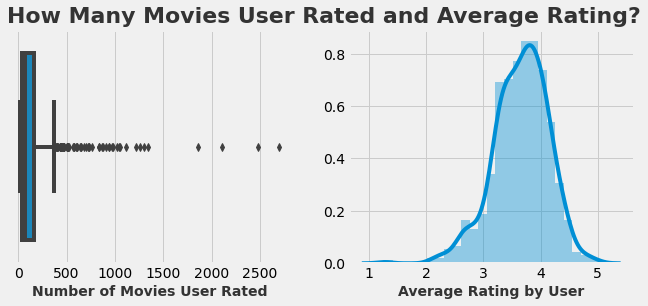

In [26]:
# Check distribution of the number of movies each user rated
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.text(0, 1.1, "How Many Movies User Rated and Average Rating?", ha='left', va='top', transform=ax1.transAxes, fontsize=22, fontweight='bold')
sns.boxplot(group_by_user_df['count'], ax=ax1)
sns.distplot(group_by_user_df['mean'], ax=ax2)
#sns.distplot(group_by_user_df['count'], ax=ax2)
ax1.set_xlabel('Number of Movies User Rated', fontsize=14)
ax2.set_xlabel('Average Rating by User', fontsize=14)
ax2.set_ylabel('');

In [27]:
# Check the number of movies by 'year_month'
group_by_year_month_df = df_ratings_movies_cleaned.groupby('year_month')['rating'].agg(['count', 'mean'])
group_by_year_month_df.describe()

,count,mean
count,267.000000,267.000000
mean,377.662921,3.547506
std,397.404169,0.328113
min,1.000000,2.605263
25%,108.000000,3.373554
50%,239.000000,3.581267
75%,526.000000,3.766599
max,2397.000000,4.619048


In [28]:
# Create new_year_month to set xticklabel
year_month_list = group_by_year_month_df.index.to_list()
len_year_month_list = len(year_month_list)

new_year_month = ['' for _ in range(len_year_month_list)]

for i in range(0, len_year_month_list, 12):
    new_year_month[i] = year_month_list[i]

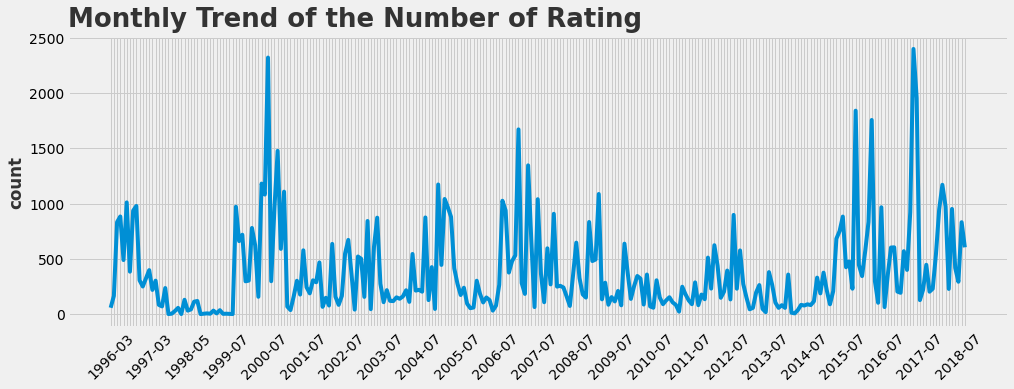

In [29]:
# Check distribution of the number of movies each user rated
fig, ax = plt.subplots(figsize=(15, 5))
plt.text(0, 1.1, "Monthly Trend of the Number of Rating", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
line = sns.lineplot(x=group_by_year_month_df.index, y=group_by_year_month_df['count'])
line.set_xticklabels(new_year_month, rotation=45)
ax.set_xlabel('');

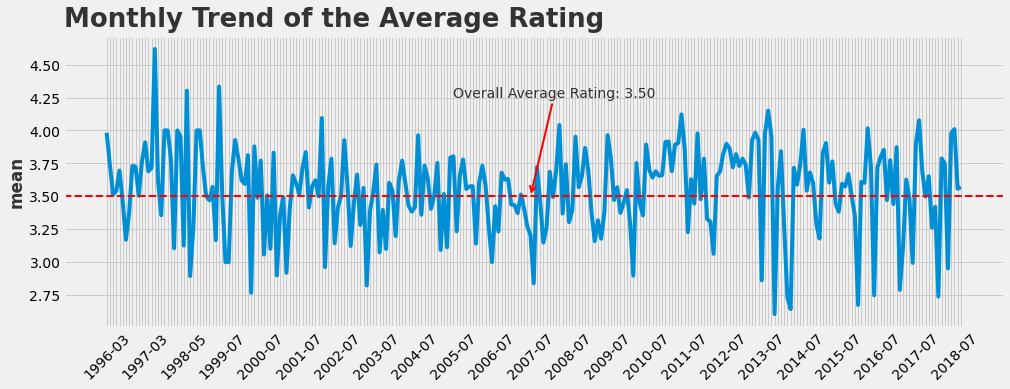

In [30]:
# Check distribution of the number of movies each user rated
fig, ax = plt.subplots(figsize=(15, 5))
plt.text(0, 1.1, "Monthly Trend of the Average Rating", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
line = sns.lineplot(x=group_by_year_month_df.index, y=group_by_year_month_df['mean'])
line.set_xticklabels(new_year_month, rotation=45)
ax.set_xlabel('')

ax.axhline(avg_rating, c='r', ls='--', lw=2)
plt.annotate(f"Overall Average Rating: {avg_rating:.2f}", ('2007-07', avg_rating), ('2005-07', avg_rating+0.75),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', ec='red', lw=2));

#### **1. Hypothesis-based EDA**
Find the top 10 rated movies in the data and how many users have rated them. (output df: two columns  MovieName - Rating)

* Oerall average rating is 3.50
* 296 out of 9724 movies got the highest rating of 5.0
* 289 out of 296 movies scored 5.0 were rated by only 1 user
* 26818 movies are rated 4.0, 20047 movies are rated 3.0 


In [31]:
group_by_movie_df = df_ratings_movies_cleaned.groupby(['movieId', 'title_cleaned'])['rating']\
    .agg(['count', 'mean']).reset_index()
df_avg_title = group_by_movie_df[['title_cleaned', 'mean']]
df_avg_title.head()

,title_cleaned,mean
0,Toy Story,3.920930
1,Jumanji,3.431818
2,Grumpier Old Men,3.259615
3,Waiting to Exhale,2.357143
4,Father of the Bride Part II,3.071429


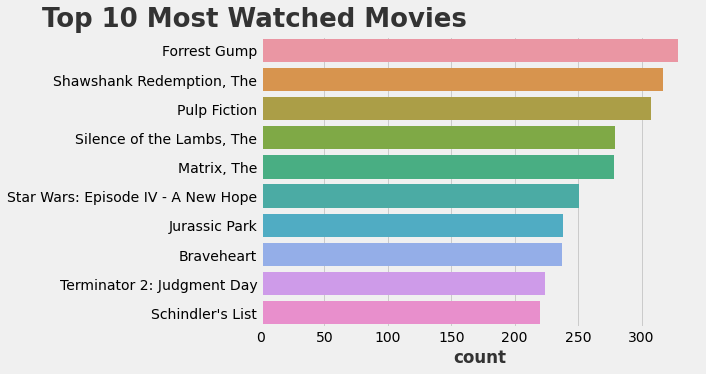

In [32]:
# Calculated the number of ratings and average rating
top_10_popular = group_by_movie_df.sort_values('count', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(7, 5))
plt.text(-0.5, 1.1, "Top 10 Most Watched Movies", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
bar = sns.barplot(x='count', y='title_cleaned', data=top_10_popular)
ax.set_ylabel('');

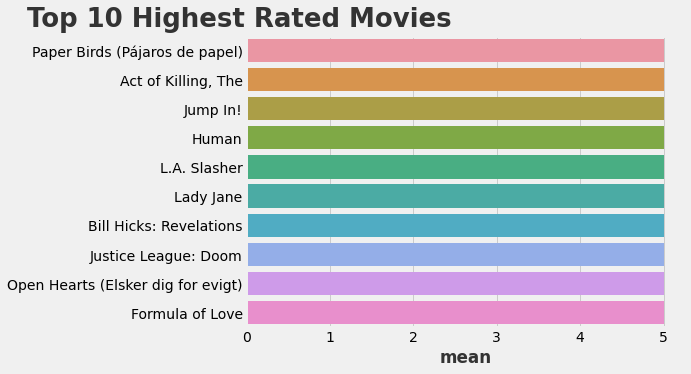

In [33]:
top_10_rating = group_by_movie_df.sort_values('mean', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(7, 5))
plt.text(-0.5, 1.1, "Top 10 Highest Rated Movies", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
bar = sns.barplot(x='mean', y='title_cleaned', data=top_10_rating)
ax.set_ylabel('');

In [34]:
# Check movies rated the highest of 5.0
group_by_movie_df[group_by_movie_df['mean'] == 5][['title_cleaned', 'count', 'mean']].sort_values('count', ascending=False)
num_rating_5 = len(group_by_movie_df[group_by_movie_df['mean'] == 5.0])
num_user_rating_5 = len(group_by_movie_df[(group_by_movie_df['mean'] == 5.0) & (group_by_movie_df['count'] == 1)])

print(f"{num_rating_5} out of {len(group_by_movie_df['movieId'])} movies are rated 5.0")
print(f"{num_user_rating_5} movies are rated by 1 user")

296 out of 9724 movies are rated 5.0
289 movies are rated by 1 user


In [35]:
# Check the number of users by rating
group_by_rating = df_ratings_movies.groupby('rating')['userId'].count().sort_values(ascending=False)
group_by_rating

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: userId, dtype: int64

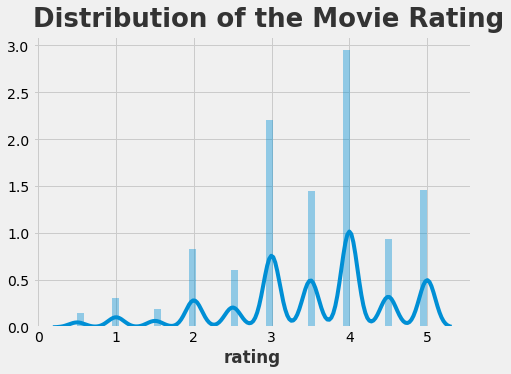

In [36]:
# Check the distribution of the rating
fig, ax = plt.subplots(figsize=(7, 5))
plt.text(0, 1.1, "Distribution of the Movie Rating", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
sns.distplot(df_ratings_movies['rating'])
ax.set_ylabel('');

#### **2. Hypothesis-based EDA**
How many unique genres are in the movie?

* 951 unique genre combination exists
* Comedy is the most popular genre followed by Drama

In [37]:
# Get the number of unique genre combination
genre_set = set(df_ratings_movies_cleaned['genres_split'])
unique_genre = list(genre_set)
num_unique_genre = len(unique_genre)
print(f'{num_unique_genre} unique genre combination exists')


951 unique genre combination exists


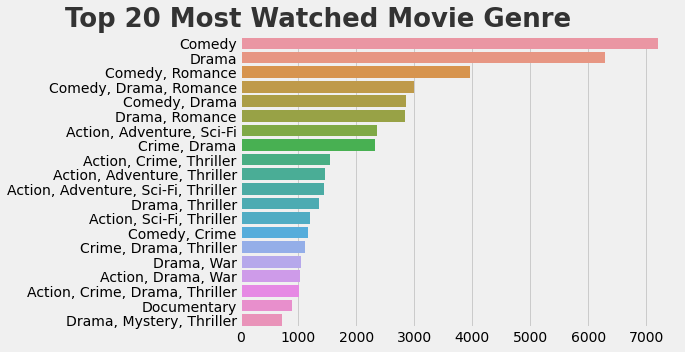

In [38]:
# Popular genre combination
genre_counter = Counter(df_ratings_movies_cleaned['genres_split'])
genre_counter = dict(sorted(genre_counter.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(7, 5))
plt.text(-0.4, 1.1, "Top 20 Most Watched Movie Genre", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
sns.barplot(x=list(genre_counter.values())[:20], y=list(genre_counter.keys())[:20]);


#### **3. Hypothesis-based EDA**
Which genres have more number of < 3 rated movies?

* Comedy genre has the highest number rated under 3.0 among other genres.
* 2083 movies rated under 3.0 is Comedy

Comedy has 2083 movies under 3.0 rating


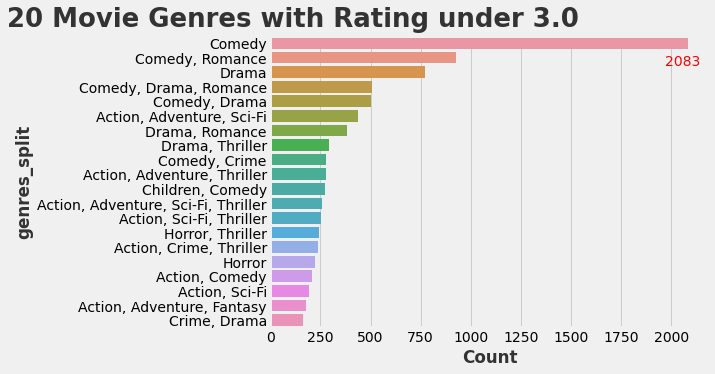

In [39]:
# Check 'genre_split' that has the most number of movies with rating under 3
rating_under_3 = df_ratings_movies_cleaned[df_ratings_movies_cleaned['rating'] < 3.0]
rating_under_3 = rating_under_3.groupby('genres_split')[['movieId']].count().sort_values('movieId', ascending=False).reset_index()
rating_under_3 = rating_under_3[:20]

print(f'Comedy has {rating_under_3.iloc[0, 1]} movies under 3.0 rating')

fig, ax = plt.subplots(figsize=(7, 5))
plt.text(-0.6, 1.1, "20 Movie Genres with Rating under 3.0", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plt.text(0.9, 0.9, "2083", transform=ax.transAxes, fontdict={'color': 'red'})
sns.barplot(x=rating_under_3['movieId'], y=rating_under_3['genres_split'])
ax.set_xlabel('Count');

#### **4. Hypothesis-based EDA**
Filter the data for genre = ‘Comedy|Romance’ & rating = 4 and create the USER_ID <> MOVIE_ID matrix

* 976 comedy and romance movies are rated 4 where 'userId' is not 'movieId'

In [40]:
matrix = df_ratings_movies_cleaned[(df_ratings_movies_cleaned['genres_split']== 'Comedy, Romance') & \
                                   (df_ratings_movies_cleaned['rating'] == 4)]
matrix = matrix[matrix['userId'] != matrix['movieId']]
print(f'{len(matrix)} rows met the conditions')
matrix.head()

976 rows met the conditions


,userId,movieId,rating,year_month,genres_split,year,title_cleaned
1,1,3,4.0,2000-07,"Comedy, Romance",1995,Grumpier Old Men
43,1,804,4.0,2000-07,"Comedy, Romance",1996,She's the One
109,1,1777,4.0,2000-07,"Comedy, Romance",1998,"Wedding Singer, The"
161,1,2492,4.0,2000-08,"Comedy, Romance",1998,20 Dates
344,4,708,4.0,2001-04,"Comedy, Romance",1996,"Truth About Cats & Dogs, The"


* 'Stephen', 'boring', and 'ghost' are the most frequently appeared tags for movies rated under 2.0
* 'atmospheric', 'classic', 'mindfuck', and 'suspenseful'are the most frequently appeared tags for movies above 4.0

In [41]:
# Check tags for movies rated under 1 and over 5
df_rading_under_1 = df_tags_ratings_cleaned[df_tags_ratings_cleaned['rating'] <= 1.0]
df_rading_over_5 = df_tags_ratings_cleaned[df_tags_ratings_cleaned['rating'] >= 5.0]

tags_under_1 = ''
for tag in df_rading_under_1['tag']:
    tags_under_1 += tag + ', '

tags_over_5 = ''
for tag in df_rading_over_5['tag']:
    tags_over_5 += tag + ', '

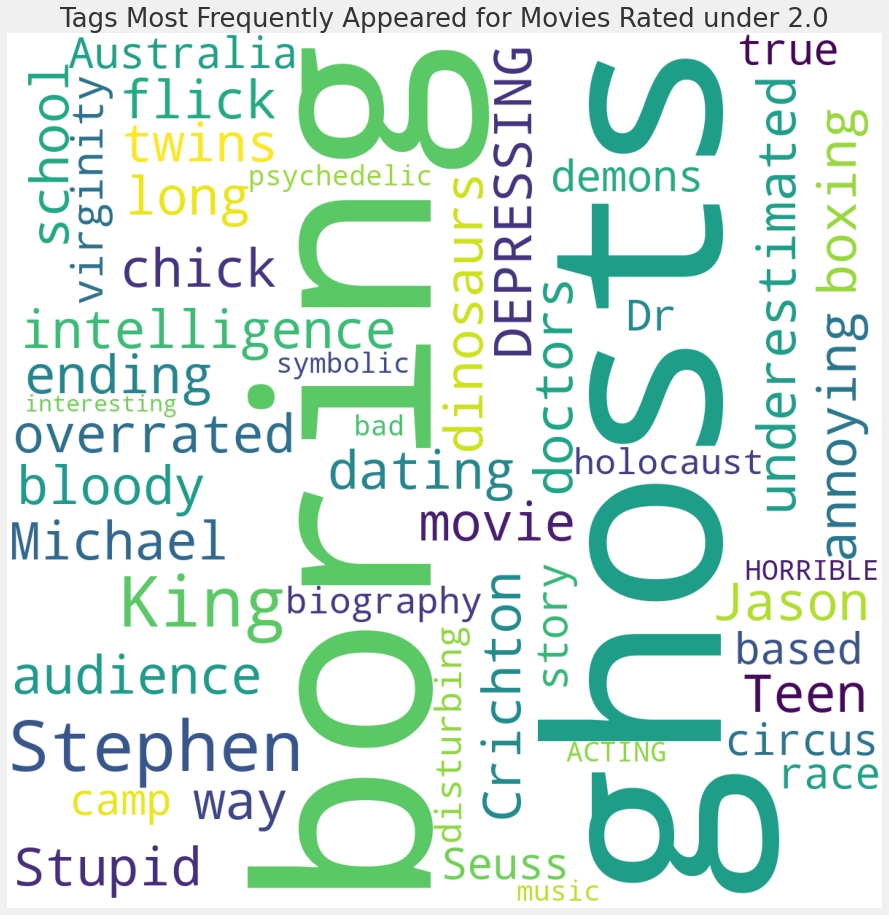

In [42]:
from wordcloud import WordCloud

# Create wordcloud
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(tags_under_1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Tags Most Frequently Appeared for Movies Rated under 2.0',fontsize = 26);

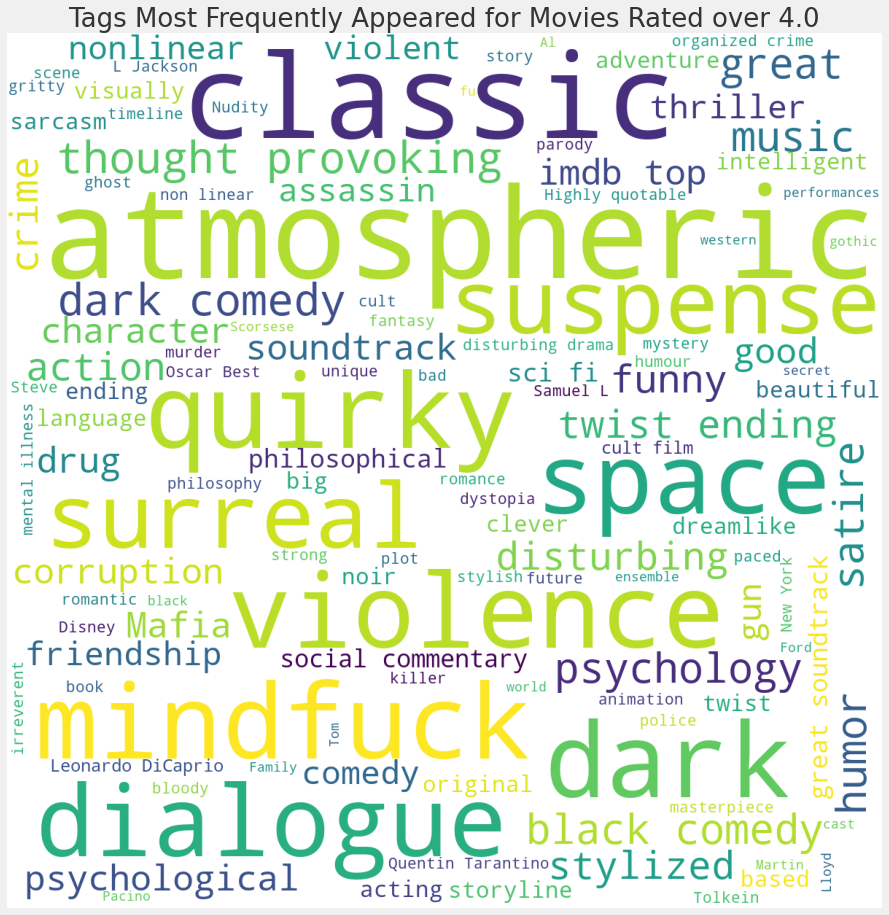

In [43]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(tags_over_5)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Tags Most Frequently Appeared for Movies Rated over 4.0',fontsize = 26);